# Exercise 4b - Image Morphology
The purpose of this exercise is to implement, test and validate different approaches to binary image morphological operations.

## Image Morphology in Python
scikit-image contain a variety of morphological operations. In this exercise we will explore the use of some of these operations on binary image.

Start by importing some function:

In [10]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from skimage import io, color
import numpy as np

and define a convenience function to show to image side by side:

In [5]:
# From https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html

def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,4),
                                  sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

### Image morpholofy on a single object

An image, lego_5.png of a lego brick can be used to test some of the basic functions.

#### Exercies 1
We will start by computing a binary image from the lego image:

- Read the image into **im_org**.
- Convert the image to gray scale.
- Find a threshold using Otus's method.
- Apply the threshold and generate a binary image **bin_img**.
- Visualize the image using plot_comparison(im_org, bin_img, 'Binary image')

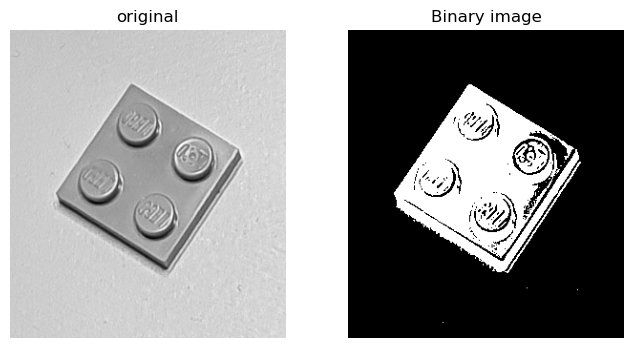

In [60]:
in_dir = "data/"
im_name = "lego_5.png"
im_org = io.imread(in_dir + im_name)

im_gray = color.rgb2gray(im_org)
thresh = threshold_otsu(im_gray)
bin_img = im_gray <= thresh

plot_comparison(im_gray, bin_img, 'Binary image')

As can be seen, the lego brick is not segmented perfectly. There are holes in the segmentation. Let us see if what we can do.

#### Exercise 2

We will start by crating a structuring element. In scikit-image they are called footprint. A disk shaped footprint can be created by:

In [53]:
footprint = disk(5)
print(footprint)

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


The morphological operation **erosion** can remove small objects, separte objects and make objects smaller. Try it on the binary lego image:

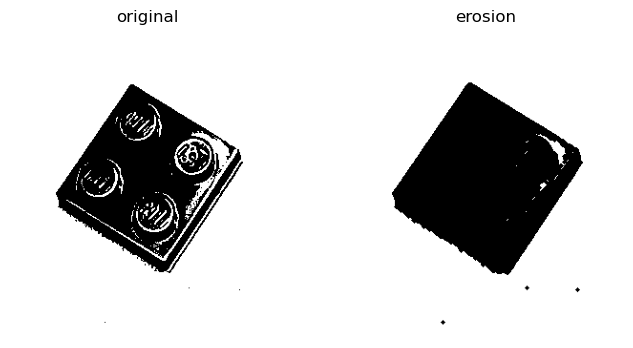

In [43]:
eroded = erosion(bin_img, footprint)
plot_comparison(bin_img, eroded, 'erosion')

Experiment with different sizes of the footprint and observe the results.

#### Exercise 3

The morphological operation **dilation** makes objects larger, closes holes and connect objects. Try it on the binary lego image:

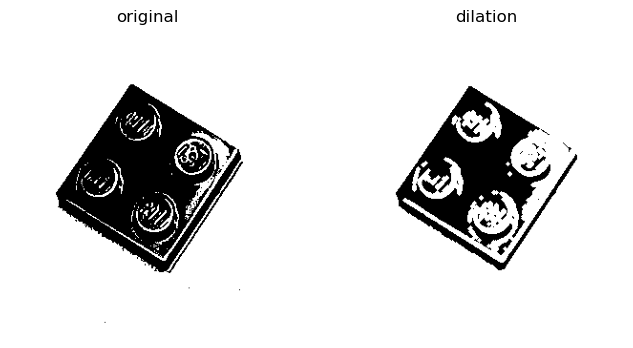

In [44]:
dilated = dilation(bin_img, footprint)
plot_comparison(bin_img, dilated, 'dilation')

#### Exercise 4
The morphological operation **opening** removes small objects without changing the size of the remaining objects. Try it on the binary lego image:

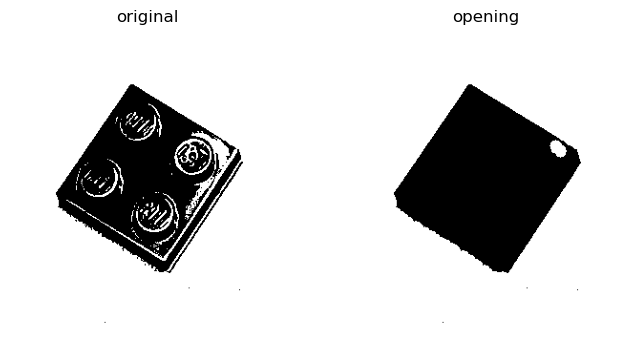

In [47]:
opened = opening(bin_img, footprint)
plot_comparison(bin_img, opened, 'opening')

#### Exercise 5
The morphological operation closing closes holes in objects without changing the size of the remaining objetcts. Try it on the binary lego image:

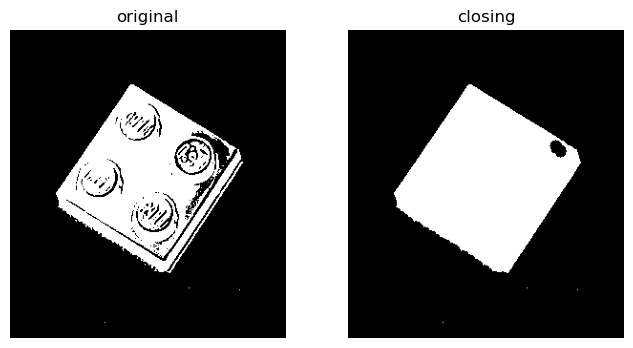

In [54]:
closed = closing(bin_img, footprint)
plot_comparison(bin_img, closed, 'closing')

### Object outline

It can be useful to compute the outline of an object both to measure the perimeter but also to see if it contains holes or other types of noise. Start by defininf an outline function:

In [55]:
def compute_outline(bin_img):
    """
    Computes the outline og a binary image
    """
    footprint = disk(1)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline 

#### Exercise 6

Compute the outline of the binary image of the lego brick. What do you observe?

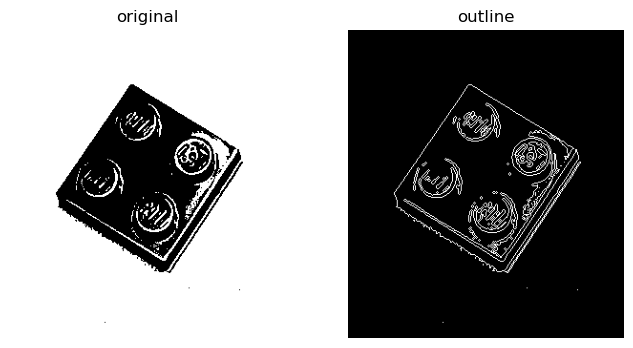

In [58]:
outline = compute_outline(bin_img)
plot_comparison(bin_img, outline, 'outline')

#### Exercise 7
Try the following:

- Do an **opening** with a disk of size 1 on the binary lego image.
- Do a **closing** with a disk of size 15 on the result of the opening.
- Compute the outline and visualize it.

What do you observe and why does the result look like that?

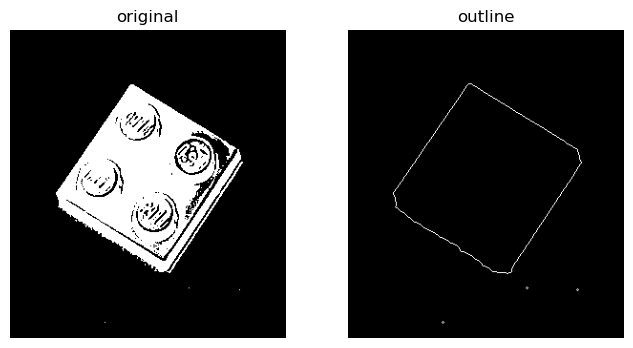

In [61]:
opened = opening(bin_img, disk(1))
closed = closing(bin_img, disk(15))
outline = compute_outline(closed)
plot_comparison(bin_img, outline, 'outline')